In [23]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("car data.csv")
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
print(dataset.shape)
cat = ["Fuel_Type", "Transmission", "Owner", "Seller_Type"]
for i in cat:
    print(dataset[i].unique())

(301, 9)
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]
['Dealer' 'Individual']


In [25]:
dataset.drop(["Car_Name"], axis=1, inplace=True)
dataset["year_old"] = 2020 #converting years to a more mathematical value for better prediction result
dataset["year_old"] -= dataset["Year"]

print(dataset.head())

   Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  year_old  
0       Manual      0         6  
1       Manual      0         7  
2       Manual      0         3  
3       Manual      0         9  
4       Manual      0         6  


In [26]:
dataset.drop(["Year"], axis=1, inplace=True)
dataset = pd.get_dummies(dataset, drop_first=True)
dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [27]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
print(X)

[[5.5900e+00 2.7000e+04 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 [9.5400e+00 4.3000e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [9.8500e+00 6.9000e+03 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 ...
 [1.1000e+01 8.7934e+04 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 [1.2500e+01 9.0000e+03 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [5.9000e+00 5.4640e+03 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]]


In [28]:
from sklearn.ensemble import ExtraTreesRegressor as ETR, RandomForestRegressor 
model = ETR()
model.fit(X,y)
print(model.feature_importances_)

[0.37080418 0.04484712 0.00040763 0.07244222 0.22665561 0.01375041
 0.12910068 0.14199216]


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.shape
y_train.shape

(240,)

In [30]:
para = [{ "n_estimators" : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
         "max_features":["auto", "sqrt"],
         "max_depth":[int(x) for x in np.linspace(5, 30, num = 6)],
         "min_samples_split" : [2, 5, 10, 15, 100],
         "min_samples_leaf" : [1, 2, 5, 10]}]
rf = RandomForestRegressor()
gs = RandomizedSearchCV(estimator = rf, param_distributions = para, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
gs.fit(X_train, y_train)
best_acc = gs.best_score_
best_para = gs.best_params_
print(best_acc)
print(best_para)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimato

In [31]:
predictions=gs.predict(X_test)

C:\Users\yash0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

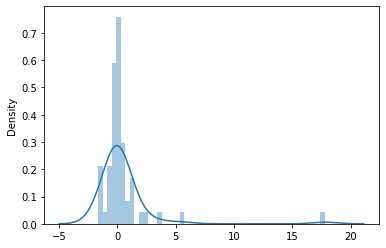

In [32]:
import seaborn as sns 
sns.distplot(y_test-predictions)

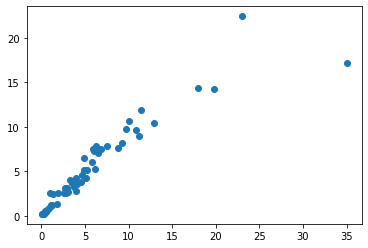

In [33]:
import matplotlib.pyplot as plt 
plt.scatter(y_test,predictions)

In [34]:
from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(metrics.r2_score(y_test, predictions))

MAE: 0.9447403913517902
MSE: 6.488102999991406
RMSE: 2.5471754945412393
0.8293522648726387
